In [ ]:
from nnfabrik.examples.mnist_optuna.mnist_schema import *
from nnfabrik.utility.hypersearch import nnfabrikOptuna
import warnings
warnings.filterwarnings('ignore')

[2025-05-13 01:40:11,097][INFO]: Connecting ming@172.17.0.1:3306
[2025-05-13 01:40:11,103][INFO]: Connected ming@172.17.0.1:3306


In [2]:
fabrikant_info = dict(fabrikant_name="mhu", email="zeitgeberH@github.com", affiliation="Reimerlab", dj_username="ming")
Fabrikant().insert1(fabrikant_info, skip_duplicates=True)

## parts that are dynamic generated

In [3]:
Seed().insert([{'seed':0}], skip_duplicates=True) ## add more seeds to check model init stability

### Dataset

In [ ]:
dataset_fn = "../mnist_Optuna.dataset.mnist_dataset_fn"
dataset_config = dict(batch_size=10) 
dataset_config_tune = {} # nothing to tune

### Model

In [ ]:
model_fn = "../mnist_Optuna.model.mnist_model_fn"
## parameters fixed for this study
model_config = {}

## parameters to be tuned
model_config_tune = {
    "h_dim": {
        "method": "suggest_int",
        "args": {"name": "hidden_dimension", "low": 2, "high": 5},
    }
}

### Trainer

In [ ]:
# specify trainer function as string (the function must be importable) as well as the trainer config
trainer_fn = "../mnist_Optuna.trainer.mnist_trainer_fn"
trainer_config = dict(epochs=8) 
trainer_config_tune =    {
    "lr": {
        "method": "suggest_float",
        "args": {"name": "learning_rate", "low": 1e-4, "high": 1e-1, "log": True},
    }
}

## Configure Optuna study with nnfabrik as backend

In [7]:
study_config = dict(direction="maximize",study_name="Mnist_nnfabrik_Optuna")
opt_config = dict(n_trials=5, timeout=600, # in seconds
                 gc_after_trial  = True, show_progress_bar = True)

In [8]:
gps_study = nnfabrikOptuna(
        optuna_study_config = study_config, # optuna study related configurations
        optuna_optimization_config = opt_config , # optuna optimization related configurations
        dataset_fn = dataset_fn,
        dataset_config = dataset_config, # dictionary of fixed arguments for dataset function
        dataset_config_tune = dataset_config_tune, # dictionary of arguments for dataset function that are to be optimized
        model_fn = model_fn,
        model_config = model_config,
        model_config_tune = model_config_tune,
        trainer_fn= trainer_fn,
        trainer_config = trainer_config,
        trainer_config_tune = trainer_config_tune,
        architect = 'mhu',
        trained_model_table = "mnist_nnfabrikOptuna.mnist_schema.TrainedModel")

## Run

In [9]:
study, best_trial = gps_study.run()

[I 2025-05-13 01:40:11,607] A new study created in memory with name: Mnist_nnfabrik_Optuna


  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 6000/6000 [00:06<00:00, 891.19it/s] 


[I 2025-05-13 01:41:09,359] Trial 0 finished with value: 79.4417 and parameters: {'hidden_dimension': 4, 'learning_rate': 0.0005207368317782651}. Best is trial 0 with value: 79.4417.


100%|██████████| 6000/6000 [00:08<00:00, 711.47it/s]


[I 2025-05-13 01:42:08,665] Trial 1 finished with value: 67.5033 and parameters: {'hidden_dimension': 4, 'learning_rate': 0.002007550302397372}. Best is trial 0 with value: 79.4417.


100%|██████████| 6000/6000 [00:06<00:00, 883.11it/s] 


[I 2025-05-13 01:43:04,154] Trial 2 finished with value: 87.2767 and parameters: {'hidden_dimension': 5, 'learning_rate': 0.0001108044959786936}. Best is trial 2 with value: 87.2767.


100%|██████████| 6000/6000 [00:06<00:00, 872.33it/s]


[I 2025-05-13 01:44:01,856] Trial 3 finished with value: 78.94 and parameters: {'hidden_dimension': 5, 'learning_rate': 0.004789741139821931}. Best is trial 2 with value: 87.2767.


100%|██████████| 6000/6000 [00:06<00:00, 862.87it/s]


[I 2025-05-13 01:44:59,081] Trial 4 finished with value: 29.7933 and parameters: {'hidden_dimension': 2, 'learning_rate': 0.013029266858441578}. Best is trial 2 with value: 87.2767.
Study statistics: 
  Number of finished trials:  5
  Number of pruned trials:  0
  Number of complete trials:  5
Best trial:
  Best score:  87.2767
  Params: 
    hidden_dimension: 5
    learning_rate: 0.0001108044959786936


## Explore results

In [11]:
print("Pruner:", study.pruner)
print("Direction:", study.direction)
print("Sampler:", study.sampler)

Pruner: <optuna.pruners._median.MedianPruner object at 0x7fbdb4c04c10>
Direction: StudyDirection.MAXIMIZE
Sampler: TPESampler


In [12]:
from optuna.trial import TrialState

all_trials = study.trials
completed = [t for t in all_trials if t.state == TrialState.COMPLETE]
pruned = [t for t in all_trials if t.state == TrialState.PRUNED]
failed = [t for t in all_trials if t.state == TrialState.FAIL]

print(f"Total trials: {len(all_trials)}")
print(f"Completed trials: {len(completed)}")
print(f"Pruned trials: {len(pruned)}")
print(f"Failed trials: {len(failed)}")

for t in pruned:
    print(f"Trial {t.number} was pruned. Intermediate values: {t.intermediate_values}")
for t in failed:
    print(f"Trial {t.number} failed. Error: {t.system_attrs.get('fail_reason')}")
print('Best trial')
study.best_trial

Total trials: 5
Completed trials: 5
Pruned trials: 0
Failed trials: 0
Best trial


FrozenTrial(number=2, state=TrialState.COMPLETE, values=[87.2767], datetime_start=datetime.datetime(2025, 5, 13, 1, 42, 8, 767442), datetime_complete=datetime.datetime(2025, 5, 13, 1, 43, 4, 154359), params={'hidden_dimension': 5, 'learning_rate': 0.0001108044959786936}, user_attrs={'trial_restriction': ('dataset_fn in ("mnist_nnfabrikOptuna.dataset.mnist_dataset_fn")', 'dataset_hash in ("1fb52248b88880405ed4585ebd69e1f9")', 'model_fn in ("mnist_nnfabrikOptuna.model.mnist_model_fn")', 'model_hash in ("24922759b843076328c4f3b9df3f88d0")', 'trainer_fn in ("mnist_nnfabrikOptuna.trainer.mnist_trainer_fn")', 'trainer_hash in ("29c74834523e7be9d79259976a28cc63")')}, system_attrs={}, intermediate_values={}, distributions={'hidden_dimension': IntDistribution(high=5, log=False, low=2, step=1), 'learning_rate': FloatDistribution(high=0.1, log=True, low=0.0001, step=None)}, trial_id=2, value=None)

In [13]:
TrainedModel()

model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,comment short description,score loss,output trainer object's output,fabrikant_name Name of the contributor that added this entry,optuna_trial_number optuna trial id,optuna_trial_state optuna trial state,trainedmodel_ts UTZ timestamp at time of insertion
mnist_nnfabrikOptuna.model.mnist_model_fn,24922759b843076328c4f3b9df3f88d0,mnist_nnfabrikOptuna.dataset.mnist_dataset_fn,1fb52248b88880405ed4585ebd69e1f9,mnist_nnfabrikOptuna.trainer.mnist_trainer_fn,1eb5efb8f09fb69363d0286441c01bbe,0,lr.0.004789741139821931.h_dim.5.,78.94,=BLOB=,mhu,3,TrialState.COMPLETE,2025-05-12 20:44:01
mnist_nnfabrikOptuna.model.mnist_model_fn,24922759b843076328c4f3b9df3f88d0,mnist_nnfabrikOptuna.dataset.mnist_dataset_fn,1fb52248b88880405ed4585ebd69e1f9,mnist_nnfabrikOptuna.trainer.mnist_trainer_fn,29c74834523e7be9d79259976a28cc63,0,lr.0.0001108044959786936.h_dim.5.,87.2767,=BLOB=,mhu,2,TrialState.COMPLETE,2025-05-12 20:43:04
mnist_nnfabrikOptuna.model.mnist_model_fn,34430fcc4550a45abd804e09cabe99bb,mnist_nnfabrikOptuna.dataset.mnist_dataset_fn,1fb52248b88880405ed4585ebd69e1f9,mnist_nnfabrikOptuna.trainer.mnist_trainer_fn,457c6b8358a5e212adb2997b26247074,0,lr.0.002007550302397372.h_dim.4.,67.5033,=BLOB=,mhu,1,TrialState.COMPLETE,2025-05-12 20:42:08
mnist_nnfabrikOptuna.model.mnist_model_fn,34430fcc4550a45abd804e09cabe99bb,mnist_nnfabrikOptuna.dataset.mnist_dataset_fn,1fb52248b88880405ed4585ebd69e1f9,mnist_nnfabrikOptuna.trainer.mnist_trainer_fn,ffda8ec6f9507d64bdc697ad8076a352,0,lr.0.0005207368317782651.h_dim.4.,79.4417,=BLOB=,mhu,0,TrialState.COMPLETE,2025-05-12 20:41:09
mnist_nnfabrikOptuna.model.mnist_model_fn,bf9f10ac4ebcfe76048e4a2380899156,mnist_nnfabrikOptuna.dataset.mnist_dataset_fn,1fb52248b88880405ed4585ebd69e1f9,mnist_nnfabrikOptuna.trainer.mnist_trainer_fn,06232c33f0413b49df1085e426ba373b,0,lr.0.013029266858441578.h_dim.2.,29.7933,=BLOB=,mhu,4,TrialState.COMPLETE,2025-05-12 20:44:59


In [14]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_hidden_dimension,params_learning_rate,user_attrs_trial_restriction,state
0,0,79.4417,2025-05-13 01:40:11.612847,2025-05-13 01:41:09.359005,0 days 00:00:57.746158,4,0.000521,"(dataset_fn in (""mnist_nnfabrikOptuna.dataset....",COMPLETE
1,1,67.5033,2025-05-13 01:41:09.469907,2025-05-13 01:42:08.665372,0 days 00:00:59.195465,4,0.002008,"(dataset_fn in (""mnist_nnfabrikOptuna.dataset....",COMPLETE
2,2,87.2767,2025-05-13 01:42:08.767442,2025-05-13 01:43:04.154359,0 days 00:00:55.386917,5,0.000111,"(dataset_fn in (""mnist_nnfabrikOptuna.dataset....",COMPLETE
3,3,78.9400,2025-05-13 01:43:04.263277,2025-05-13 01:44:01.856695,0 days 00:00:57.593418,5,0.004790,"(dataset_fn in (""mnist_nnfabrikOptuna.dataset....",COMPLETE
4,4,29.7933,2025-05-13 01:44:01.965247,2025-05-13 01:44:59.081246,0 days 00:00:57.115999,2,0.013029,"(dataset_fn in (""mnist_nnfabrikOptuna.dataset....",COMPLETE


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

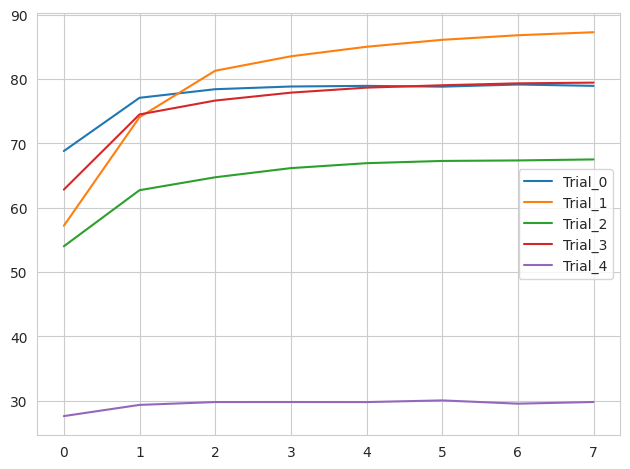

In [26]:
tmods = TrainedModel.fetch('output', 'comment', 'score', as_dict=True)
fig = plt.figure()
accs = []
for idx, tmod1 in enumerate(tmods):
    accs.append(tmod1['output'][0]) # loss
    plt.plot(accs[-1], label=f'Trial_{idx}')
plt.legend()
plt.tight_layout()